In [2]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [3]:
print("pythonのバージョンは{}です".format(sys.version))
print("pandasのバージョンは{}です".format(pd.__version__))
print("matplotlibのバージョンは{}です".format(matplotlib.__version__))

pythonのバージョンは3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]です
pandasのバージョンは0.23.4です
matplotlibのバージョンは3.0.2です


In [4]:
# 適当に名前を用意してみる
names = ['Bob','Jessica','Mary','John','Mel']

In [13]:
# 用意された名前からランダムに名前を選んでサイズ1000のリストに入れる

random.seed(5000)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]
random_names[:10]

['John',
 'Mary',
 'Jessica',
 'Jessica',
 'Mary',
 'John',
 'Bob',
 'John',
 'Mary',
 'John']

In [14]:
# ランダムに出生数をサイズ1000のリストで生成
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[583, 436, 472, 993, 715, 756, 683, 876, 911, 614]

In [15]:
# 名前と出生数のタプルのリストを作成
baby_data_set = list(zip(random_names,births))
baby_data_set[:10]

[('John', 583),
 ('Mary', 436),
 ('Jessica', 472),
 ('Jessica', 993),
 ('Mary', 715),
 ('John', 756),
 ('Bob', 683),
 ('John', 876),
 ('Mary', 911),
 ('John', 614)]

In [17]:
# DataFrameオブジェクトを作成してみる
df = pd.DataFrame(data = baby_data_set, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,John,583
1,Mary,436
2,Jessica,472
3,Jessica,993
4,Mary,715
5,John,756
6,Bob,683
7,John,876
8,Mary,911
9,John,614


In [20]:
# テキスト形式で書き出して見る
df.to_csv('births1880.txt',index=False,header=False)

In [23]:
# csvを読み込むのと同じ方法で読み込んで見る
df = pd.read_csv('./births1880.txt')

In [24]:
# 情報を見てみる
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
John    999 non-null object
583     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [25]:
df

,John,583
0,Mary,436
1,Jessica,472
2,Jessica,993
3,Mary,715
4,John,756
5,Bob,683
6,John,876
7,Mary,911
8,John,614
9,John,878


In [27]:
# 上の方のデータを見てみる
df.head()

,John,583
0,Mary,436
1,Jessica,472
2,Jessica,993
3,Mary,715
4,John,756


In [28]:
# ↑また一番上のデータがヘッダとして読みこまれている
df = pd.read_csv("./births1880.txt",header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [29]:
# 一番下の方のデータを見てみる
df.tail()

,0,1
995,Jessica,708
996,Mel,340
997,Mel,128
998,Bob,870
999,John,799


In [39]:
df = pd.read_csv("./births1880.txt",names=["Names","Births"])
df.head(5)

,Names,Births
0,John,583
1,Mary,436
2,Jessica,472
3,Jessica,993
4,Mary,715


In [40]:
# かぶりをなくしたデータを取得してみる
df["Names"].unique()

array(['John', 'Mary', 'Jessica', 'Bob', 'Mel'], dtype=object)

In [41]:
# まあ同じこと
for x in df["Names"].unique():
    print(x)

John
Mary
Jessica
Bob
Mel


In [42]:
# こんな方法でも出力できる
print(df["Names"].describe())

count     1000
unique       5
top       Mary
freq       206
Name: Names, dtype: object


In [46]:
# 名前ごとに集計をとってみる
name = df.groupby("Names")
print(name)
df = name.sum()
print(df)

         Births
Names          
Bob       98949
Jessica  102153
John      95344
Mary      96421
Mel       92592


In [47]:
sorted_names = df.sort_values(['Births'],ascending=False)
sorted_names.head(1)

,Births
Names,
Jessica,102153


,Births
Names,
Jessica,102153
Bob,98949
Mary,96421
John,95344
Mel,92592


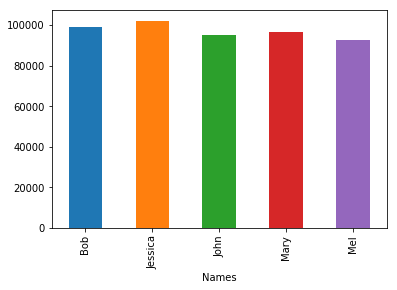

In [49]:
df['Births'].plot.bar()
df.sort_values(by='Births',ascending=False)